In [ ]:
#### ----------python_speech_features-------------------------------------------------------

In [15]:
from python_speech_features import mfcc
from python_speech_features import logfbank
from python_speech_features import delta
from python_speech_features import fbank
import scipy.io.wavfile as wav
(rate,sig) = wav.read('audio_sample_data/1/1-1-0000.wav')

mfcc_feat = mfcc(sig,rate)  # Compute delta features from a feature vector sequence.

d_mfcc_feat = delta(mfcc_feat,2)  # 微分求导  Compute delta features from a feature vector sequence.

fbank_feat = logfbank(sig, rate)  # Compute log Mel-filterbank energy features from an audio signal.
print(rate)  # 采样率
print(fbank_feat[1:3,:])
print('mfcc_feat shape: ', mfcc_feat.shape)
print('d_mfcc_feat shape: ', d_mfcc_feat.shape)
print('fbank_feat shape: ',fbank_feat.shape)


22050
[[13.7718959  17.65464792 17.06310849 17.39854467 15.53049435 14.75259465
  14.09994548 13.76699347 13.8245095  13.98050286 13.43889081 14.23453185
  13.96421137 14.41651309 14.02137227 12.92637931 13.34390947 13.25829169
  12.67398965 12.74775182 11.83518969 12.22411674 12.56250655 12.60898017
  13.07045186 12.6266817 ]
 [13.7322965  17.36867373 17.55058516 17.15765169 15.03504997 13.61706831
  13.04752744 13.37011971 13.54398306 14.68023654 14.98421795 14.8503675
  14.49672124 14.27547785 13.51077288 12.96050378 12.63871405 12.87001904
  12.57648952 12.19887036 11.83984641 12.07760588 12.39984664 12.29403267
  13.15971588 12.78319162]]
mfcc_feat shape:  (897, 13)
d_mfcc_feat shape:  (897, 13)
fbank_feat shape:  (897, 26)


In [35]:
from python_speech_features import fbank  #  Compute Mel-filterbank energy features from an audio signal.

In [10]:
# 画图
import matplotlib.pyplot as plt

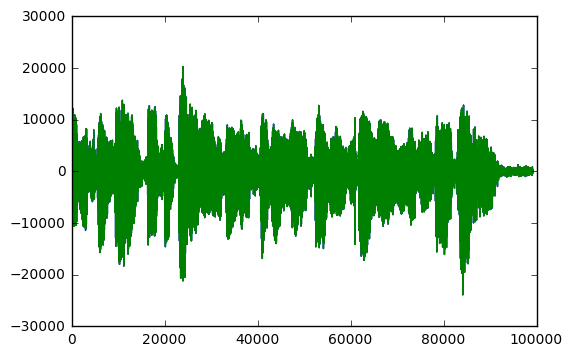

In [11]:
# 原始信号
plt.plot(sig)
plt.show()

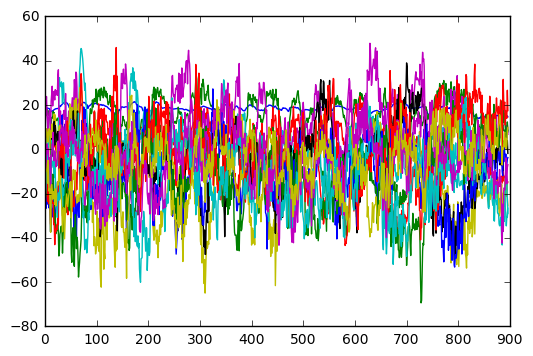

In [12]:
# mfcc 特征
plt.plot(mfcc_feat)
plt.show()

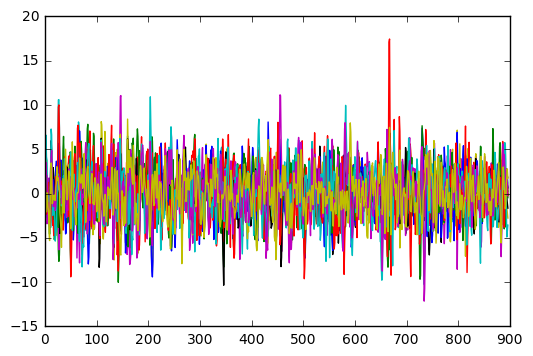

In [14]:
# delta 特征
plt.plot(d_mfcc_feat)
plt.show()

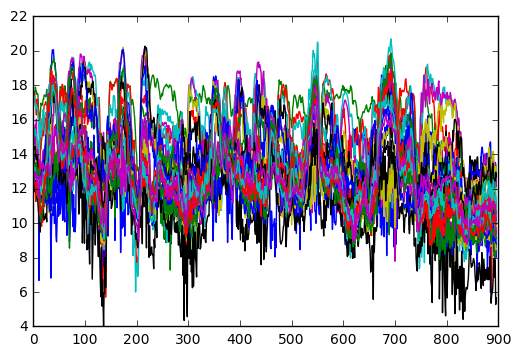

In [16]:
# logfbank 特征
plt.plot(fbank_feat)
plt.show()

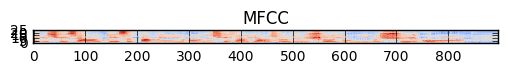

In [19]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
fig, ax = plt.subplots()
mfcc_data = np.swapaxes(fbank_feat, 0, 1)
cax = ax.imshow(mfcc_data, interpolation='nearest', cmap=cm.coolwarm,origin='lower')
ax.set_title('MFCC')
plt.show()

In [ ]:
#### --------------speechpy------------------------------------------------------------------------------

In [20]:
#### speechpy #####
!pip install speechpy

In [32]:
import scipy.io.wavfile as wav
import numpy as np
import speechpy
import os
fs,signal = wav.read('audio_sample/1/1-1-0000.wav')
signal = signal[:,0]
print('signal spape = ',signal.shape)
# Example of pre-emphasizing
signal_preemphasized = speechpy.processing.preemphasis(signal, cof=0.98)  # 预加重

# Example of staching frames 分帧
frames = speechpy.processing.stack_frames(signal, 
                                          sampling_frequency=16000,
                                          frame_length=0.020, 
                                          frame_stride=0.01,
                                          filter=lambda x: np.ones((x,)),
                                          zero_padding=True)  # 分帧
# Example of extracting power spectrum  功率谱
power_spectrum = speechpy.processing.power_spectrum(frames, fft_points=512)
print('power spectrum shape= ', power_spectrum.shape)

# ########### Extract MFCC features 美尔频率倒谱系数 #############
mfcc = speechpy.feature.mfcc(signal,
                            sampling_frequency=16000,
                            frame_length=0.020,
                            frame_stride=0.01,
                            num_filters=40,
                            fft_length=512, 
                            low_frequency=0, 
                            high_frequency=None )
print('mfcc feature shape= ',mfcc.shape)

mfcc_cmvn = speechpy.processing.cmvnw(mfcc, win_size=301, variance_normalization=True)
print('mfcc(mean + variance normalized) feature shape= ', mfcc_cmvn.shape)

mfcc_feature_cube = speechpy.feature.extract_derivative_feature(mfcc)  # input N x M ; return N x M x 3
print('mfcc feature cube shape= ', mfcc_feature_cube.shape)

######## Extract logenergy features #######
logenergy = speechpy.feature.lmfe(signal,
                                  sampling_frequency=16000,
                                  frame_length=0.020,
                                  frame_stride=0.01,
                                  num_filters=40,
                                  fft_length=512,
                                  low_frequency=0,
                                  high_frequency=None)
logenergy_feature_cube = speechpy.feature.extract_derivative_feature(logenergy)
print('logenergy features= ', logenergy.shape)


signal spape =  (99225,)
619 99225 320 160.0
power spectrum shape=  (619, 257)
mfcc feature shape=  (618, 13)
mfcc(mean + variance normalized) feature shape=  (618, 13)
mfcc feature cube shape=  (618, 13, 3)
logenergy features=  (618, 40)


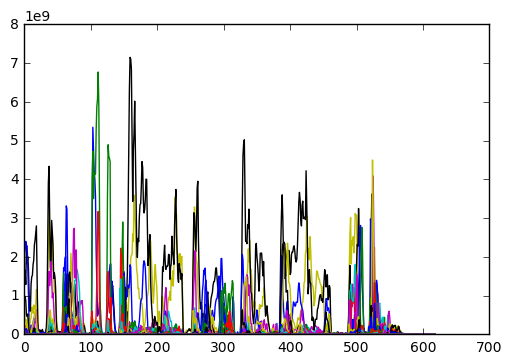

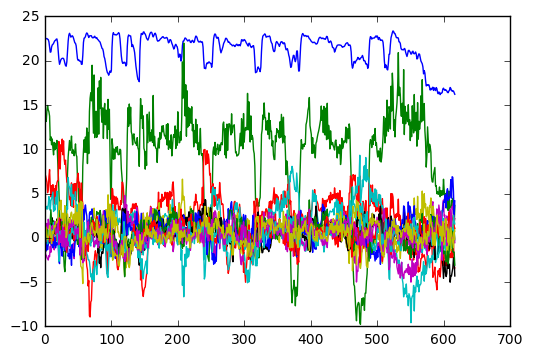

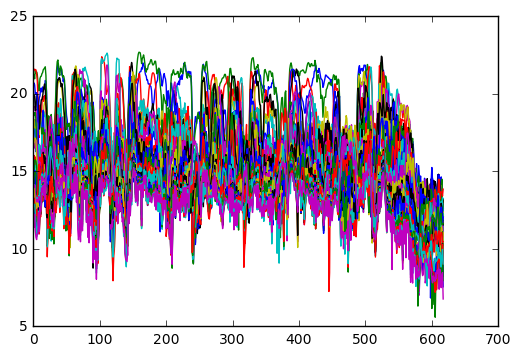

In [33]:
plt.plot(power_spectrum)
plt.show()
plt.plot(mfcc)
plt.show()
plt.plot(logenergy)
plt.show()

###   ---------------fbank & mfcc detail tutorial---------------------------------------------------------------------


    1.ame the signal into short frames.
    2.each frame calculate the periodogram estimate of the power spectrum.
    3.ply the mel filterbank to the power spectra, sum the energy in each filter.
    4.ke the logarithm of all filterbank energies.
    5.ke the DCT of the log filterbank energies.
    6.ep DCT coefficients 2-13, discard the rest.
There are a few more things commonly done, sometimes the frame energy is appended to each feature vector. Delta and Delta-Delta features are usually also appended. Liftering is also commonly applied to the final features.

In [234]:
import numpy
import scipy.io.wavfile as wav
from scipy.fftpack import dct
(sample_rate,sig) = wav.read('audio_sample_data/1/1-1-0000.wav')


In [235]:
signal = sig[0:int(2*sample_rate)][:,0]  # keep the first 3.5 seconds
T = signal.shape[0] / float(sample_rate)
t = numpy.arange(signal.shape[0] / float(sample_rate))
print(sample_rate)
print(signal.shape)
print(T)
print(t)

22050
(44100,)
2.0
[0. 1.]


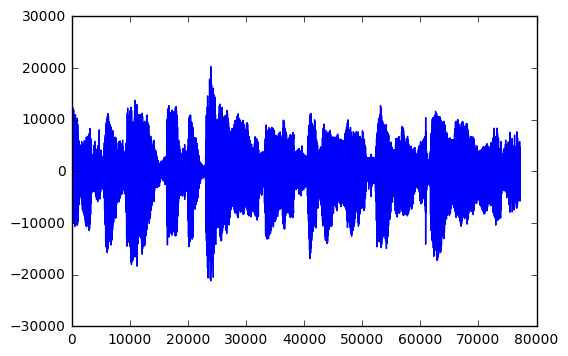

In [56]:
# 画图
import matplotlib.pyplot as plt
plt.plot(signal)
plt.show()

In [236]:
##  Pre-Emphasis  预加重
pre_emphasis = 0.97
emphasized_signal = numpy.append(signal[0], signal[1:] - pre_emphasis*signal[:-1])

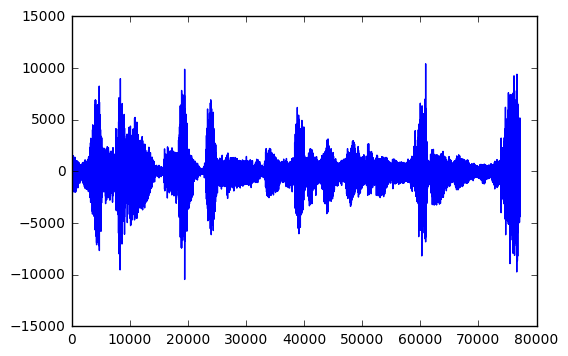

In [214]:
plt.plot(emphasized_signal)
plt.show()

In [237]:
## Framing  分帧
frame_size = 0.025
frame_stride = 0.01
sample_rate=8000
frame_length, frame_step = frame_size * sample_rate, frame_stride * sample_rate
signal_length = len(emphasized_signal)  # 信号长度
frame_length = int(round(frame_length))  # 帧长
frame_step = int(round(frame_step))  # 帧步长
num_frames = int(numpy.ceil(float(numpy.abs(signal_length - frame_length)) / frame_step)) # 帧数

pad_signal_length = num_frames * frame_step + frame_length # 分帧后统一的信号长度
z = numpy.zeros((pad_signal_length - signal_length))
# Pad Signal to make sure that all frames have equal number of samples without truncating any samples from the original signal
pad_signal = numpy.append(emphasized_signal, z)  # 统一长度后的信号
indices = numpy.tile(numpy.arange(0, frame_length), (num_frames, 1)) + numpy.tile(numpy.arange(0, num_frames * frame_step, frame_step), (frame_length, 1)).T
frames = pad_signal[indices.astype(numpy.int32, copy=False)]


In [238]:
print(pad_signal_length)
print(frame_length)
print(frame_step)
print(num_frames)
frames.shape

44120
200
80
549


(549, 200)

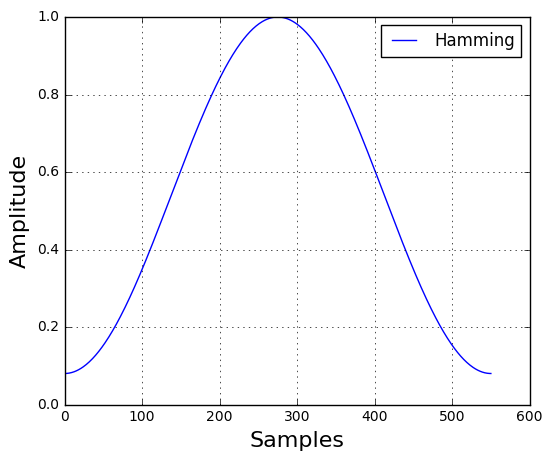

In [217]:
##  Window 加窗
# apply Hamming window to each frame
'''
w[n] = 0.54 − 0.46 cos ( \frac{2πn}{N − 1} )
'''
#  其中，0 <= n <= N-1, N是窗长度

n = numpy.arange(frame_length)
h = 0.54 -0.46 * numpy.cos((2 * numpy.pi * n) / (frame_length - 1))
plt.figure(figsize=(6,5))
plt.plot(h, label ='Hamming')
plt.ylabel('Amplitude',fontsize=16)
plt.xlabel('Samples', fontsize=16)
plt.legend()
plt.grid(True)
plt.savefig('hamming_window.jpg', bbox_inches = 'tight', dpi=200)
plt.show()

In [218]:
frames *= numpy.hamming(frame_length)
# frames *= 0.54 - 0.46 * numpy.cos((2 * numpy.pi * n) / (frame_length - 1))  # Explicit Implementation **

In [219]:
##  Fourier-Transform and Power Spectrum  傅里叶变换 和功率谱
#  对每一帧作N-point FFT计算频率谱，该变换也叫做短时傅里叶变换（STFT），其中，N典型为256或者512；接着使用以下式子计算功率谱（周期图谱）
'''
P = \frac{|FFT(x_i)|^2}{N}   ，其中，x_i是信号x第i个帧
'''
NFFT = 512
mag_frames = numpy.absolute(numpy.fft.rfft(frames, NFFT))  # Magnitude of the FFT
pow_frames = ((1.0/NFFT) * ((mag_frames)**2))  # Power Spectrum

In [220]:
##  Filter Banks 滤波器组
#  最后一步使用三角形滤波器计算滤波器组，通常使用40个滤波器，nfilt=40 用一个梅尔缩放(Mel-scale)处理功率谱(power spectrum)抽取频率段(frequency bands)。
#  梅尔缩放的目的就是模拟人耳感知声音的非线性性。更好的识别低频信号，减弱低频信号。
#  使用如下的 公式完成 Hertz(f) 和Mel(m)之间的转换
'''
m = 2595 \log_{10} (1 + \frac{f}{700})
f = 700 (10^{m/2595} - 1)
'''
#  滤波器组中每一个滤波器都是三角形的，中间频率为1，两个相邻滤波器之间的频率线性下降直到为0。
#  使用以下 滤波器组 方程建模，
#  滤波器是三角滤波器，第一个滤波器从第一点开始，第二个时取得最大值，第三个点又归零。
#  第二个滤波器从第二个点开始，第三点时达到最大值，第四点归零，依次类推。由下面的公式表达：
#  m表示滤波器个数， f（）表示m+2梅尔间隔频率（Mel-spaced frequencies）列表
'''
H_m(k) =
  \begin{cases}
      \hfill 0                                      \hfill & k < f(m - 1) \\
      \\
      \hfill \dfrac{k - f(m - 1)}{f(m) - f(m - 1)}  \hfill & f(m - 1) \leq k < f(m) \\
      \\
      \hfill 1                                      \hfill & k = f(m) \\
      \\
      \hfill \dfrac{f(m + 1) - k}{f(m + 1) - f(m)}  \hfill & f(m) < k \leq f(m + 1) \\
      \\
      \hfill 0                                      \hfill & k > f(m - 1) \\
  \end{cases}
'''
# FilterBanks
nfilt = 40
low_freq_mel = 0  # 梅尔尺度的下限
high_freq_mel = (2595 * numpy.log10(1 + (sample_rate / 2) / 700 ))  # Convert Hz to Mel 梅尔尺度的上限
mel_points = numpy.linspace(low_freq_mel, high_freq_mel, nfilt + 2)  # Equally spaced in Mel scale
hz_points = (700 * (10**(mel_points / 2595) - 1 ))  # Convert Mel to Hz
bin = numpy.floor((NFFT + 1) * hz_points / sample_rate)  # FFT bins

fbank = numpy.zeros((nfilt, int(numpy.floor(NFFT / 2 + 1))))
for m in range(1, nfilt +1):
    f_m_minus = int(bin[m - 1])  # left
    f_m = int(bin[m])            # center
    f_m_plus = int(bin[m + 1])   # right
    
    for k in range(f_m_minus, f_m):
        fbank[m - 1, k] = (k - bin[m - 1]) / (bin[m] - bin[m - 1])
    for k in range(f_m, f_m_plus):
        fbank[m-1, k] = (bin[m+1] - k) / (bin[m+1] - bin[m])



In [221]:
print(sample_rate)
print(bin)
print(fbank.shape)
print(hz_points)
print(fbank[39,])

22050
[  0.   1.   2.   3.   5.   6.   8.  10.  11.  13.  16.  18.  20.  23.
  26.  29.  32.  36.  39.  43.  48.  52.  57.  62.  68.  74.  80.  87.
  95. 103. 111. 120. 130. 141. 152. 164. 177. 190. 205. 221. 238. 256.]
(40, 257)
[    0.            49.81143579   103.16741321   160.32015897
   221.53984806   287.11588088   357.35825133   432.59901226
   513.19384508   599.52374125   691.99680325   791.05017381
   897.15210238  1010.80415866  1132.54360367  1262.94592946
  1402.62757964  1552.24886347  1712.51707726  1884.18984797
  2068.07871467  2265.0529649   2476.04374402  2702.04845693
  2944.13548304  3203.4492268   3481.21552756  3778.7474544
  4097.45151334  4438.83429624  4804.50960281  5196.20606945
  5615.77534096  6065.20082364  6546.60706144  7062.26977909
  7614.62664011  8206.28877015  8840.05310047  9518.91558973
 10246.08538655 11025.        ]
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.        

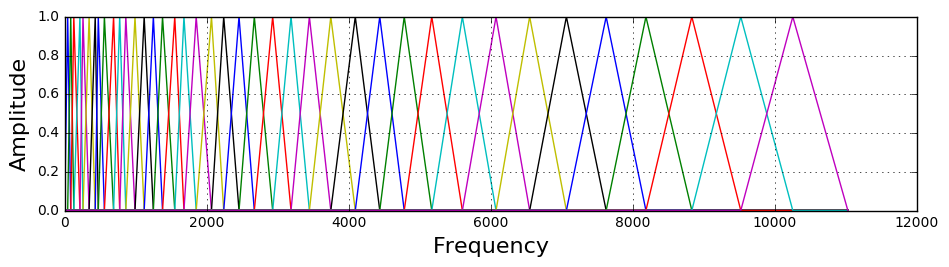

In [222]:
#  plot Filter banks
plt.figure(figsize=(11, 2.5))
plt.plot(numpy.linspace(low_freq_mel, (sample_rate/2), 257),fbank.T)
plt.ylabel('Amplitude',fontsize=16)
plt.xlabel('Frequency', fontsize=16)
plt.grid(True)
plt.savefig('mel_filters.jpg', bbox_inches='tight',dpi=200)
plt.show()

In [223]:
#  Feature
filter_banks = numpy.dot(pow_frames, fbank.T)
filter_banks = numpy.where(filter_banks ==0, numpy.finfo(float).eps, filter_banks)  # Numerical Stability
filter_banks = 20 * numpy.log10(filter_banks)  # dB
print(filter_banks.shape)

(349, 40)


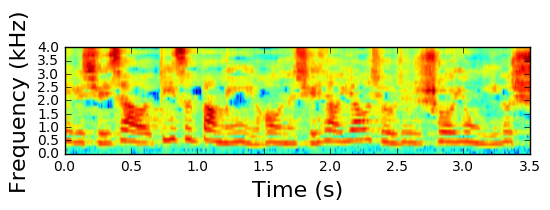

In [224]:
  # 功率谱经过滤波器组之后， 可以得到如下的声谱图。
plt.imshow(numpy.flipud(filter_banks.T), cmap=cm.jet,aspect=0.2, extent=[0,T,0,4])
plt.ylabel('Frequency (kHz)', fontsize=16)
plt.xlabel('Time (s)', fontsize=16)
plt.savefig('filter_banks_raw.jpg', bbox_inches='tight',dpi=200)
plt.show()

In [138]:
#如果梅尔缩放滤波器组就是我们想要的特征，那么可以跳过平均归一化
'''
当选择滤波器的个数为40时，滤波器表现为以40个长度为K/2 向量的三角滤波器。傅里叶的窗为512个采样点，那么这一组滤波器如下图（a）。单独一个滤波器如第8个和第20个滤波器如图（c）（e），将每一个梅尔滤波器乘以能量谱就得到了每一个滤波器滤波后的能量（how much energy was in each filterbank）。
下面会详细介绍如何计算梅尔滤波器能量。 
'''

In [225]:
##  Mel-frequency Cepstral Coefficients(MFCCs) 梅尔倒频谱系数
#  上一步计算的过滤器组系数 的结果具有高度的相关性。作为特征输入会存在一些问题。因此，
#  使用 离散余弦变换（Discrete Cosine Transform, DCT）将过滤器组系数去相关性得到滤波器组的压缩表示。
#  典型的，在自动语音识别中（Automatic Speech Recognition, ASR）,保留2-13变换系数；num_ceps=12,
#  因为滤波器组是有重叠的，滤波器的能量彼此相关；离散余弦变换能够去相关，比如在HMM分类器，对角协方差矩阵就能构造。
#  但是只有12-26 离散余弦变换系数被保留，由于高阶系数表示快速变化的滤波器能量，其对信号的识别不好，所以将它们舍弃。
#  丢弃其他系数的原因是它们代表了滤波器组系数的快速变化，而这些细微的细节并不有助于自动语音识别
num_ceps = 12
mfcc = dct(filter_banks, type=2, axis=1, norm='ortho')[:, 1:(num_ceps+1)]  # 离散余弦变换 Keep 2-13
print(mfcc.shape)

(349, 12)


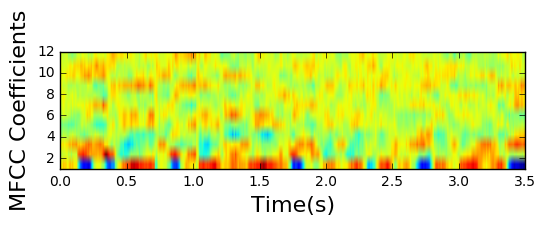

[[ 66.43056132  74.04421364  81.94218481 ... 100.31880426  98.27230361
  100.66907214]
 [ 75.22985097  35.35239128  74.03489822 ... 100.28668625 102.00563243
  102.47198313]
 [ 76.20371034  69.17687971  85.96277237 ... 100.90062725 100.90651289
  101.12960736]
 ...
 [ 42.25759814  53.73563693  72.46415501 ... 146.24285208 128.60768071
  120.74055801]
 [ 56.27704165  33.5312182   71.48635402 ... 156.85059457 130.89076177
  130.41343776]
 [ 66.87334441  48.11142231  67.49735311 ... 149.38298223 130.70023031
  131.78068823]]


In [226]:
plt.imshow(numpy.flipud(mfcc.T), cmap=cm.jet, aspect=0.08, extent=[0,T,1,num_ceps])
plt.ylabel('MFCC Coefficients', fontsize=16)
plt.xlabel('Time(s)', fontsize=16)
plt.savefig('mfcc_new.jpg', bbox_inches='tight', dpi=200)
plt.show()
print(filter_banks)

In [227]:
##  此外，我们可以尝试将正弦同态滤波应用到MFCC上，以降低对高频MFCC的重视，
#  这种做法被声称可以提高高噪声信号的语音识别能力。
def lifter(cepstra, L=22):
    """Apply a cepstral lifter the the matrix of cepstra. This has the effect of increasing the
    magnitude of the high frequency DCT coeffs.
    :param cepstra: the matrix of mel-cepstra, will be numframes * numcep in size.
    :param L: the liftering coefficient to use. Default is 22. L <= 0 disables lifter.
    """
    if L > 0:
        nframes,ncoeff = numpy.shape(cepstra)
        n = numpy.arange(ncoeff)
        lift = 1 + (L/2.)*numpy.sin(numpy.pi*n/L)
        return lift*cepstra
    else:
        # values of L <= 0, do nothing
        return cepstra

lifter_mfcc = lifter(mfcc)
print(lifter_mfcc.shape)

(349, 12)


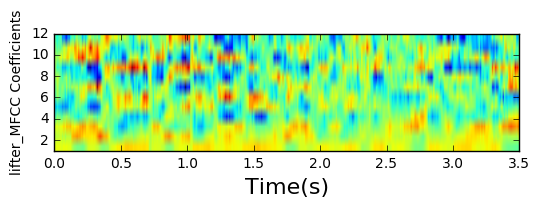

In [230]:
plt.imshow(numpy.flipud(lifter_mfcc.T), cmap=cm.jet, aspect=0.08, extent=[0,T,1,num_ceps])
plt.ylabel('lifter_MFCC Coefficients', fontsize=10)
plt.xlabel('Time(s)', fontsize=16)
plt.savefig('lifter_mfcc_new.jpg', bbox_inches='tight', dpi=200)
plt.show()

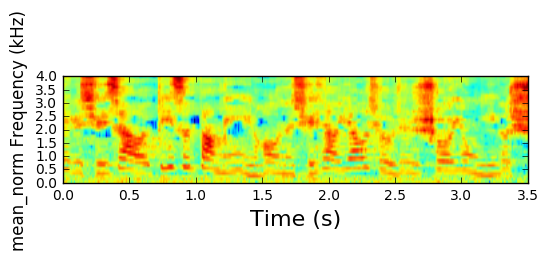

In [232]:
##  Mean Normalization
#  如前描述，为了平衡各组信号谱之间数值上的差异和提高信噪比，我们可以对每一帧的系数相应减去平均值
mean_norm_filter_banks =filter_banks - (numpy.mean(filter_banks, axis=0) + 1e-8)

plt.imshow(numpy.flipud(mean_norm_filter_banks.T), cmap=cm.jet,aspect=0.2, extent=[0,T,0,4])
plt.ylabel('mean_norm Frequency (kHz)', fontsize=12)
plt.xlabel('Time (s)', fontsize=16)
plt.savefig('mean_norm_filter_banks.jpg', bbox_inches='tight', dpi=200)
plt.show()


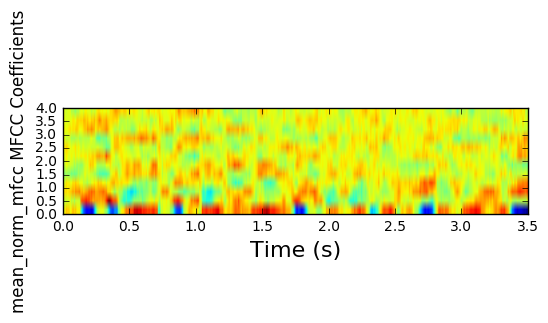

In [233]:
##  同样，对MFCCs也可以作如上操作
mean_norm_mfcc = mfcc - (numpy.mean(mfcc,axis=0) + 1e-8)

plt.imshow(numpy.flipud(mean_norm_mfcc.T), cmap=cm.jet,aspect=0.2, extent=[0,T,0,4])
plt.ylabel('mean_norm_mfcc MFCC Coefficients', fontsize=12)
plt.xlabel('Time (s)', fontsize=16)
plt.savefig('mean_norm_mfcc_MFCC_Coefficients.jpg', bbox_inches='tight', dpi=200)
plt.show()

In [ ]:
##   Filter Banks 和 MFCCs 的比较

#  在这一点上，前面已经按步骤讨论了FBank和MFCC计算过程的动机与实现， 有趣的是，计算滤波器组所需的所欲步骤都是由
#  语音信号的性质和人类对这些信号的感知所驱动的。另一方面，接下来计算mfcc的步骤是被机器学习算法限制所驱动的。DTC操作
#  也是为了去除FBank系数的相关性。这种操作也被称作白化。此外，MFCCs和FMMs-HMMs结合在一起非常受欢迎。二者双剑合璧在
#  一段时期内是自动语音识别ASR的基本理论研究。随着深度学习在语音系统中的发展。考虑到深层神经网络不易受到高度相关输入的影响，
#  因此离散余弦变换(DCT)不再是必要的步骤，人们可能会质疑MFCCs是否仍然是正确的选择。
#  值得注意的是，DCT是一种线性变换，由于它丢弃了一些高度非线性的语音信号中的信息因此不受欢迎。

#    对傅里叶变换计算是否必要提出质疑是明智的。傅里叶变换其根本就是线性变换，选择直接忽略它并直接尝试直接从时域信号
#  中学习可能是有益的。确实，最近已经有一些尝试的工作并取得了不错的效果报告。然而，傅里叶变换是一个很难学习的操作，
#  并且可能想要达到同样的性能效果需要跟多的数据和跟复杂的模型。此外，使用短时傅里叶变换STFT,我们已经夹着在短时期内
#  信号是静止的。因此，线性的傅里叶变换不会造成严重的问题。
##  结论
#  在这篇文章中，我们探讨了计算梅尔缩放滤波器组（FBanks）和梅尔频率倒谱系数(MFCCs)的过程。讨论了程序中每个步骤的动机和实现。
#  我们还讨论了FBanks比MFCCs越来越受欢迎的原因。


In [11]:

#-----------test--------------------------
# import librosa
import scipy.io.wavfile as wav
import numpy as np
import pandas as pd
from python_speech_features import delta
from python_speech_features import fbank

TRUNCATE_SOUND_FIRST_SECONDS =  3
SAMPLE_RATE = 16000
def read_audio(filename, sample_rate=None):
    # audio, sr = librosa.load(filename, sr=sample_rate, mono=True)
    sr, audio = wav.read(filename)
    audio = audio.flatten() * 1.0 / np.max(audio)
    return audio

def _truncate_sound(audio, truncate):
    sidx = np.random.randint(len(audio)-truncate+1)
    return audio[sidx :  sidx+truncate]

def _normalize_frames(m):
    return [(v - np.mean(v)) / np.std(v) if np.std(v)!=0 else (v - np.mean(v)) for v in m]


def _load_wav(filename):
    #libri_batch['raw_audio'] = libri_batch['filename'].apply(lambda x: read_audio(x, sample_rate=self.SAMPLE_RATE))
    raw_audio = read_audio(filename, sample_rate=SAMPLE_RATE)
    
    #existing_frames = libri_batch['raw_audio'].apply(lambda x: len(x)).values
    max_frames = TRUNCATE_SOUND_FIRST_SECONDS * SAMPLE_RATE
    
    if len(raw_audio) >= max_frames:
        raw_audio = _truncate_sound(raw_audio, max_frames)  
    else:
        raw_audio = np.concatenate((raw_audio, np.zeros(max_frames-len(x)) )) 
    
    return raw_audio


In [12]:
#read wav ,output signal
signal = _load_wav('audio_sample_data/1/1-1-0000.wav')


In [261]:
TRUNCATE_SOUND_FIRST_SECONDS*SAMPLE_RATE

24000

In [13]:

filter_banks, _ = fbank(signal, samplerate=SAMPLE_RATE, nfilt=64, winlen=0.025) # (NUMFRAMES,64)
# print("len_fbank =", len(filter_banks))
# print(filter_banks[0])
# print("    ****** fbank: time = %f" % (time.time()-st))


delta_1 = delta(filter_banks, N=1)
# print(delta_1[0])
# print("    ****** delta: time = %f" % (time.time()-st))
delta_2 = delta(delta_1, N=1)
# print(delta_2[0])
# exit()

# st = time.time()
filter_banks = _normalize_frames(filter_banks)
delta_1 = _normalize_frames(delta_1)
delta_2 = _normalize_frames(delta_2)
# print("    ****** _normalize frame: time = %f" % (time.time()-st))

frames_features = np.hstack([filter_banks, delta_1, delta_2]) # (NUMFRAMES, 64*3)
# frames_features = filter_banks
num_frames = len(frames_features)  # 299
network_inputs = []
for j in range(8, num_frames - 8):  
    frames_slice = frames_features[j - 8:j + 8] # (16,64*3)
    network_inputs.append(np.reshape(frames_slice, (32, 32, 3)))
network_inputs = np.array(network_inputs)


In [33]:
num_frames

299

In [30]:
network_inputs.shape

(283, 32, 32, 3)